(1000, 1)
RMSE: 20.487988968355808
MSE: 419.7576919674694


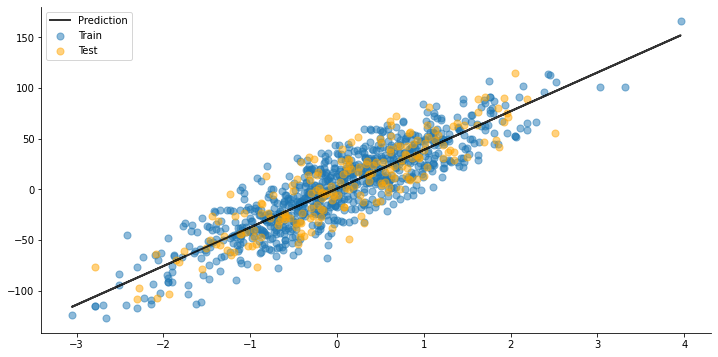

In [15]:
class LinearRegression:
    
    #constructor
    def __init__(self, learning_rate = 1e-3, n_iters = 100):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def _get_prediction(self,X):
                    
        ww = np.dot(X,self.weights)
        
        
        prediction = ww+self.bias
       
        return prediction
    
    #initialize weights and bias
    def _init_params(self):
        self.weights = np.zeros(self.n_features)
        self.bias = 0
    
    #update weights and bias
    def _update_params(self, dw, db):
        #when we calculate the error in gradients, we define error as y_pred - y, so if error is positive, 
        #that means we overestimate the prediction, so we need to take a step back
        self.weights -= self.lr * dw
        self.bias -= self.lr*db
    
    def _get_gradients(self, y, X, y_pred):
        error = y_pred - y
        w = 0
        dw = (1 / self.n_samples) * np.dot(X.T, error)
        db = (1 / self.n_samples) * np.sum(error)
        #for x, e in zip(X.T, error):
        #    w += x*e
        #dw = (1/self.n_samples)*w
        #e = 0
        #for errors in error:
        #    e += errors
        #db = (1/self.n_samples)*e
        return dw, db
    
    #fit the model, get the final weights and bias
    def fit(self,X,y):
        #get number of samples and features
        self.n_samples, self.n_features = X.shape
        #initiate parameters
        self._init_params()
        
        #perform gradient descent for n iterations 
        for _ in range(self.n_iters):
            y_pred = self._get_prediction(X)
            dw,db = self._get_gradients(y,X,y_pred)
            self._update_params(dw,db)
        
        
    def predict(self,X):
        y_pred = self._get_prediction(X)
        return y_pred
    
    
    
#testing
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    
    def mse(y_true, y_pred):
        sums = 0.0
        for i in range(len(y_true)):
            prediction_error = y_pred[i]-y_true[i]
            sums+= (prediction_error**2)
        return sums / float(len(y_true))
    
    def rmse(y_true, y_pred):
        return np.sqrt(np.mean((y_pred-y_true)**2))
    
    # get dataset
    X, y = datasets.make_regression(
        n_samples=1000, n_features=1, noise=20, random_state=1
    )

   
    # split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    # instantiate regressor
    linreg = LinearRegression(learning_rate=0.01, n_iters=1000)
    linreg.fit(X_train, y_train)

    predictions = linreg.predict(X_test)
    print(f"RMSE: {rmse(y_test, predictions)}")
    print(f"MSE: {mse(y_test, predictions)}")

    # plot results
    fig, ax = plt.subplots(1,1, figsize=(12,6))

    ax.scatter(
        X_train, 
        y_train,
        s=50,
        alpha=0.5,
        label='Train'
    )

    ax.scatter(
        X_test,
        y_test,
        c='orange',
        s=50,
        alpha=0.5,
        label='Test'
    )
    
    ax.plot(
        X, linreg.predict(X), 
        c='black', lw=2, alpha=0.8, label='Prediction'
    )

    for spine in ['top','right']:
        ax.spines[spine].set_visible(False)

    plt.legend()
    plt.show()
            

In [3]:
import numpy as np